In [2]:
%matplotlib inline 

from scipy import ndimage
from scipy import misc
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import math
import colorsys

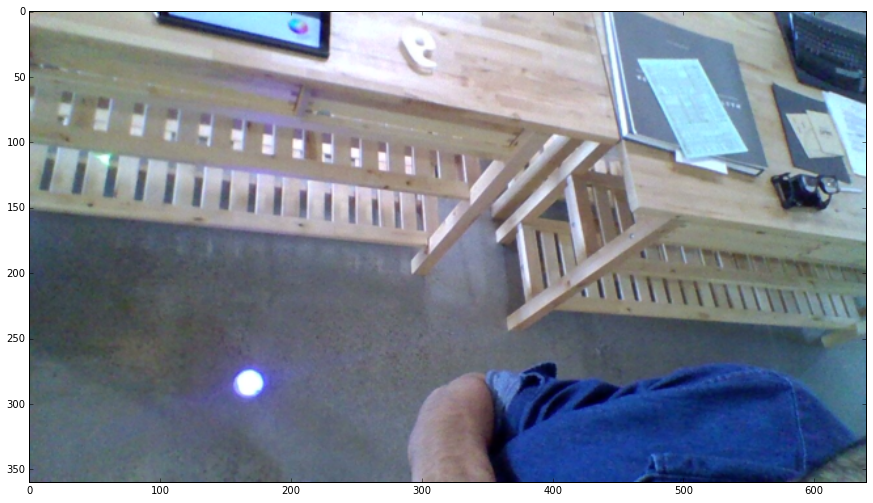

In [9]:
image = ndimage.imread("./testImages/3.jpg")
image = misc.imresize(image, 0.5)
imageScaled = image.astype(float)
imageScaled /= 255.0

hsvImage = colors.rgb_to_hsv(imageScaled)

# plt.axis('auto')
def showImage(image):
    fig = plt.figure(figsize=(15, 15))
    a = fig.add_subplot(111)
    a.imshow(image)
    return a

showImage(imageScaled)

In [10]:
#r, g, b
ballColor = (253.0/255.0, 0.0/255.0, 255.0/255.0)
laserColor = (0.0/255.0, 219.0/255.0, 132.0/255.0)

def colorDistance(a, b):
    '''hsv distance'''
    aHsv = colorsys.rgb_to_hsv(*a)
    bHsv = colorsys.rgb_to_hsv(*b)
    
    hueDist = abs(aHsv[0]-bHsv[0])
    satDist = abs(aHsv[1]-bHsv[1])
    valDist = abs(aHsv[2]-bHsv[2])
    
    hueWeight = 100
    satWeight = 50
    valWeight = 0
    return (hueWeight*hueDist + satWeight*satDist + valWeight*valDist)/(hueWeight+satWeight+valWeight)
    
    
def lowPassFilter(image):
    return ndimage.gaussian_filter(image, (1, 1, 0))
    
def brightest(image, hsv=False):
    hsvImage = 0
    if(hsv):
        hsvImage = image
    else:
        hsvImage = colors.rgb_to_hsv(image)
    
    v = hsvImage[:,:,2]
    return v.max()


1.0
0.0562646801335 0.121040743273
0.883095534784 0.70713692283


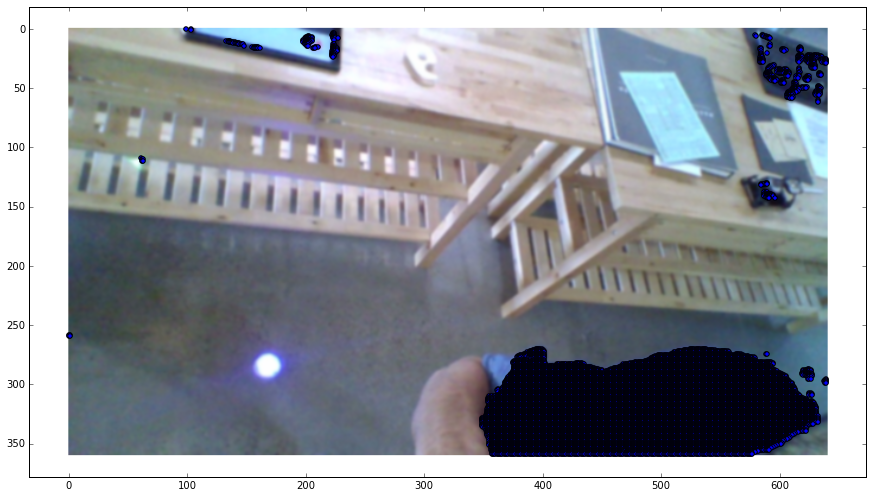

In [12]:
lowpass = lowPassFilter(imageScaled)
lowpassHsv = colors.rgb_to_hsv(lowpass)


b = brightest(lowpassHsv, True)
print b

rowIdxs = []
colIdxs = []
ballDist = {}
laserDist = {}

def toKey(row, col):
    return str(row)+","+str(col)

def fromKey(key):
    return map(lambda s: float(str), key.split(","))

def cutoff(minV, maxV):
    diff = maxV - minV
    return minV + 0.2*diff
    

for rowIdx, row in enumerate(lowpassHsv):
    for colIdx, pixel in enumerate(row):
        bDist = colorDistance(ballColor, colorsys.hsv_to_rgb(*pixel))
        lDist = colorDistance(laserColor, colorsys.hsv_to_rgb(*pixel))
        ballDist[toKey(rowIdx, colIdx)] = bDist
        laserDist[toKey(rowIdx, colIdx)] = lDist

minBD = min(ballDist.values())
minLD = min(laserDist.values())
maxBD = max(ballDist.values())
maxLD = max(laserDist.values())
print minBD, minLD
print maxBD, maxLD
        
for rowIdx, row in enumerate(lowpassHsv):
    for colIdx, pixel in enumerate(row):
        bDist = ballDist[toKey(rowIdx, colIdx)]
        lDist = laserDist[toKey(rowIdx, colIdx)]
        if(  ((bDist < cutoff(minBD, maxBD)) or (lDist <  cutoff(minLD, maxLD))) ): #(abs(pixel[2] - b) < 0.005) and #(bDist < cutoff(minBD, maxBD)) or 
            rowIdxs.append(rowIdx)
            colIdxs.append(colIdx)

p = showImage(lowpass)
p.scatter(colIdxs, rowIdxs)
